### Importenado as bibliotecas

In [34]:
import pandas as pd
import numpy as np
from pandas import Series
import matplotlib.pylab as plt
from datetime import datetime
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Diagrama de autocorrelação(ACF) e Diagrama de autocorrelação parcial(PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Modelo Arima
from statsmodels.tsa.arima_model import ARIMA

# Resíduos
from pandas import DataFrame

# Auto Arima
from pmdarima.arima import auto_arima

# Random Forest
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE

In [35]:
data = pd.read_csv('Dados//AirPassengers.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
data

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

### Técnica de Machine Learning
Vamos usar Random Forest para identificar períodos importantes

In [36]:
# Aplicando diferenciação para remover o efeito sazonal

differenced = data.diff(12)
differenced.head(n=13)

Month
1949-01-01    NaN
1949-02-01    NaN
1949-03-01    NaN
1949-04-01    NaN
1949-05-01    NaN
1949-06-01    NaN
1949-07-01    NaN
1949-08-01    NaN
1949-09-01    NaN
1949-10-01    NaN
1949-11-01    NaN
1949-12-01    NaN
1950-01-01    3.0
Name: #Passengers, dtype: float64

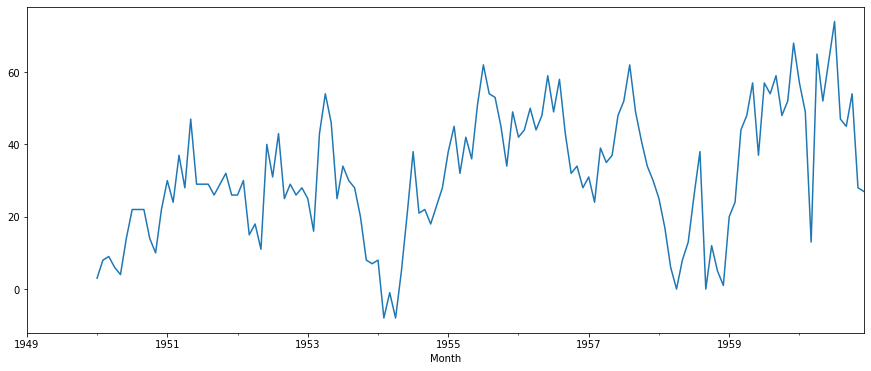

In [37]:
differenced.plot()
plt.show()

In [38]:
# Removendo os 12 primeiros meses

differenced = differenced[12:]

In [39]:
differenced.head(n=13)

Month
1950-01-01     3.0
1950-02-01     8.0
1950-03-01     9.0
1950-04-01     6.0
1950-05-01     4.0
1950-06-01    14.0
1950-07-01    22.0
1950-08-01    22.0
1950-09-01    22.0
1950-10-01    14.0
1950-11-01    10.0
1950-12-01    22.0
1951-01-01    30.0
Name: #Passengers, dtype: float64

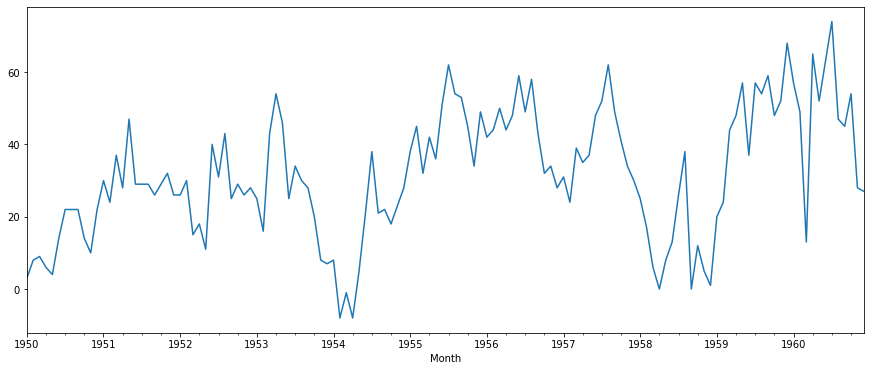

In [40]:
differenced.plot()
plt.show()

In [41]:
dataframe = pd.DataFrame()
for i in range(12, 0, -1):
    dataframe['t-'+str(i)] = differenced.shift(i)
    dataframe['t'] = differenced.values
print(dataframe.head(13))
dataframe = dataframe[13:]

            t-12     t  t-11  t-10  t-9  t-8   t-7   t-6   t-5   t-4   t-3  \
Month                                                                        
1950-01-01   NaN   3.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1950-02-01   NaN   8.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1950-03-01   NaN   9.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1950-04-01   NaN   6.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   3.0   
1950-05-01   NaN   4.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   3.0   8.0   
1950-06-01   NaN  14.0   NaN   NaN  NaN  NaN   NaN   NaN   3.0   8.0   9.0   
1950-07-01   NaN  22.0   NaN   NaN  NaN  NaN   NaN   3.0   8.0   9.0   6.0   
1950-08-01   NaN  22.0   NaN   NaN  NaN  NaN   3.0   8.0   9.0   6.0   4.0   
1950-09-01   NaN  22.0   NaN   NaN  NaN  3.0   8.0   9.0   6.0   4.0  14.0   
1950-10-01   NaN  14.0   NaN   NaN  3.0  8.0   9.0   6.0   4.0  14.0  22.0   
1950-11-01   NaN  10.0   NaN   3.0  8.0  9.0   6.0   4.0  14.0  

### Usando o Random Forest

In [42]:
array = dataframe.values
X = array[:, 0:-1]
y = array[:, -1]

In [43]:
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

### Gerando os itens mais importantes

In [44]:
print(model.feature_importances_)

[0.0249511  0.37561103 0.01541998 0.0167022  0.01435688 0.02521651
 0.02093459 0.02271564 0.02462942 0.05339896 0.12840096 0.27766272]


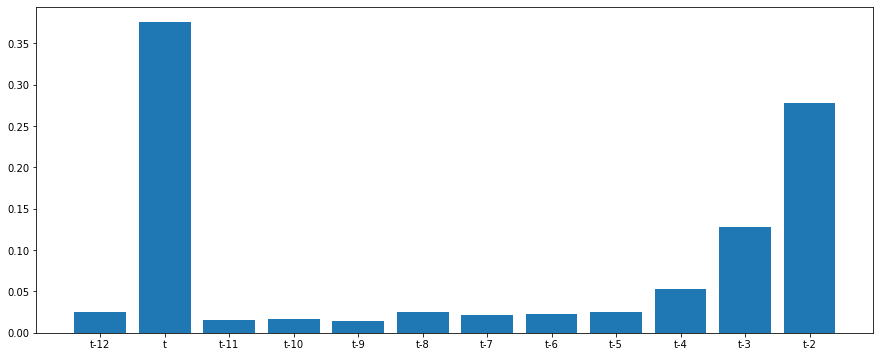

In [45]:
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
plt.bar(ticks, model.feature_importances_)
plt.xticks(ticks, names)
plt.show()

In [46]:
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
fit = rfe.fit(X, y)

In [47]:
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])

t
t-4
t-3
t-2


Isso significa que as lags mais importantes para prever os valores para frente são os que estão acima, ou seja, teriamos 
uma melhor previsão usando até 4 períodos
